In [2]:
import numpy as np

x = np.array([1, 2, 3])
y = np.array([10, 20, 30])

X, Y = np.meshgrid(x, y)


In [3]:
X

array([[1, 2, 3],
       [1, 2, 3],
       [1, 2, 3]])

In [4]:
Y

array([[10, 10, 10],
       [20, 20, 20],
       [30, 30, 30]])

y ↑

30 | ● ● ●

20 | ● ● ●

10 | ● ● ●

    +--------
    
      1 2 3 → x

      


In [5]:
x.shape

(3,)

In [6]:
X.shape

(3, 3)

In [8]:
Y.shape

(3, 3)

Cuando entrenas un modelo (por ejemplo, una regresión logística o un clasificador), puedes usar meshgrid para generar una rejilla de puntos que cubra todo el espacio de características.

In [9]:
x0, x1 = np.meshgrid(x, y)


In [10]:
x0

array([[1, 2, 3],
       [1, 2, 3],
       [1, 2, 3]])

In [11]:
x1

array([[10, 10, 10],
       [20, 20, 20],
       [30, 30, 30]])

Aplanamos ambas matrices con .ravel()

In [12]:
x0_flat = x0.ravel()
x1_flat = x1.ravel()


In [16]:
 x0_flat

array([1, 2, 3, 1, 2, 3, 1, 2, 3])

In [17]:
 x1_flat

array([10, 10, 10, 20, 20, 20, 30, 30, 30])

Los combinamos con np.c_[]

In [18]:
X_new = np.c_[x0_flat, x1_flat]

In [19]:
X_new

array([[ 1, 10],
       [ 2, 10],
       [ 3, 10],
       [ 1, 20],
       [ 2, 20],
       [ 3, 20],
       [ 1, 30],
       [ 2, 30],
       [ 3, 30]])

In [21]:
X_new.shape

(9, 2)

Cada fila de X_new es un punto del plano (x, y).
Es lo que luego le pasarás al modelo con model.predict(X_new)

Cómo se usa en un gráfico

Cuando quieres visualizar un modelo (por ejemplo, las fronteras de decisión):

1)Generas un meshgrid (como el de [1,2,3] y [10,20,30], pero más denso).

2)Predices en todos los puntos (model.predict(X_new))

3)Das forma a las predicciones (.reshape(x0.shape)).

4) Dibujas las curvas con plt.contour(x0, x1, predicciones).

In [22]:
import numpy as np
import matplotlib.pyplot as plt

x = np.array([1, 2, 3])
y = np.array([10, 20, 30])


In [23]:
x0, x1 = np.meshgrid(x, y)

In [24]:
x0

array([[1, 2, 3],
       [1, 2, 3],
       [1, 2, 3]])

In [25]:
x1

array([[10, 10, 10],
       [20, 20, 20],
       [30, 30, 30]])

Por ejemplo aplicamos la función z=x+y

In [26]:
zz= x0 +x1

In [27]:
zz

array([[11, 12, 13],
       [21, 22, 23],
       [31, 32, 33]])

Visualizamos con contour (curvas de nivel)

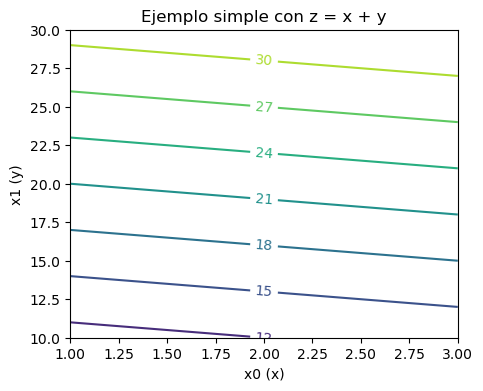

In [28]:
plt.figure(figsize=(5, 4))
contour = plt.contour(x0, x1, zz, cmap="viridis")
plt.clabel(contour, inline=True)
plt.xlabel("x0 (x)")
plt.ylabel("x1 (y)")
plt.title("Ejemplo simple con z = x + y")
plt.show()


In [29]:
print(contour.levels)

[ 9. 12. 15. 18. 21. 24. 27. 30. 33.]
